In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('fashion-mnist_train.csv')

In [2]:
df.shape

(60000, 785)

In [3]:

df=np.array(df)
m,n=df.shape
np.random.shuffle(df)
data_test=df[0:1000].T
Y_dev=data_test[0]
X_dev=data_test[1:n]
 
data_train=df[1000:m].T
Y_train=data_train[0]
X_train=data_train[1:n]

X_train=X_train/255
_,m_train = X_train.shape



In [17]:
def init_paras():    
    w1=np.random.rand(10,784)-0.5 #to get values between 0.5 and -0.5
    b1=np.random.rand(10,1)-0.5
    w2=np.random.rand(10,10)-0.5 #to get values between 0.5 and -0.5
    b2=np.random.rand(10,1)-0.5

    return w1,b1,w2,b2
def relu(z1):
    return np.maximum(z1,0)

def softmax(z):
   expZ = np.exp(z - np.max(z,axis=0,keepdims=True))
   return expZ / expZ.sum(axis=0, keepdims=True)


def forward_prop(w1,b1,w2,b2,X):
    z1=w1.dot(X)+b1
    a1=relu(z1)
    z2=w2.dot(a1)+b2
    a2=softmax(z2)
    return z1,a1,z2,a2

def one_hot(y):
    one_hot=np.zeros((y.size,y.max()+1))
    one_hot[np.arange(y.size),y]=1
    return one_hot.T

def relu_deriv(z):
    return z>0

def backward_prop(z1,a1,z2,a2,w1,w2,X,y):
    m=y.size
    one_hot_y= one_hot(y)
    dz2= a2-one_hot_y

    dw2 = 1 / m * dz2.dot(a1.T) 
    db2= 1/m*np.sum(dz2, axis=1, keepdims=True)
    dz1= w2.T.dot(dz2)*relu_deriv(z1)

    dw1 = 1 / m * dz1.dot(X.T)
    db1=1/m*np.sum(dz1, axis=1, keepdims=True)

    return dw1,db1,dw2,db2

def update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha):
    w1=w1-alpha*dw1
    b1=b1-alpha*db1
    w2=w2-alpha*dw2
    b2=b2-alpha*db2
    return w1,b1,w2,b2


def get_predict(a2):
    return np.argmax(a2,axis=0)

def accuracy(prediction,y):
    return np.sum(prediction==y)/y.size

def gradiant_descent(X,y,iterations,alpha):
    w1,b1,w2,b2=init_paras()
    for i in range(iterations):
        z1,a1,z2,a2=forward_prop(w1,b1,w2,b2,X)
        dw1,db1,dw2,db2=backward_prop(z1,a1,z2,a2,w1,w2,X,y)
        w1,b1,w2,b2=update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha)
        if i%150==0:
            print('iterations: ',i)
            prediction=get_predict(a2)
            print('accuracy: ',accuracy(prediction,y)*100)

    return w1,b1,w2,b2


w1,b1,w2,b2=gradiant_descent(X_train,Y_train,1500,0.1)


iterations:  0
accuracy:  10.0
iterations:  150
accuracy:  65.53559322033898
iterations:  300
accuracy:  71.98983050847457
iterations:  450
accuracy:  74.60169491525423
iterations:  600
accuracy:  76.08813559322034
iterations:  750
accuracy:  77.28474576271186
iterations:  900
accuracy:  78.14237288135594
iterations:  1050
accuracy:  78.85254237288135
iterations:  1200
accuracy:  79.48983050847458
iterations:  1350
accuracy:  79.93898305084745


prediction 9
label 9


<Figure size 1200x1200 with 0 Axes>

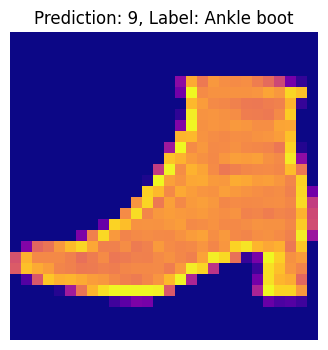

prediction 8
label 8


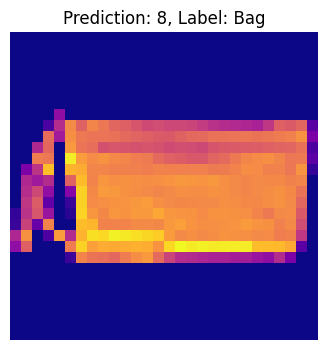

prediction 2
label 2


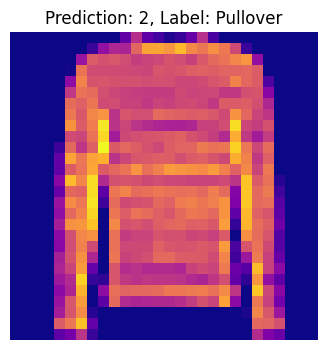

prediction 1
label 1


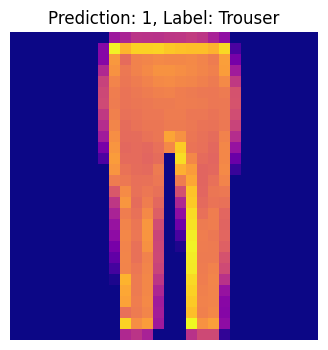

prediction 7
label 5


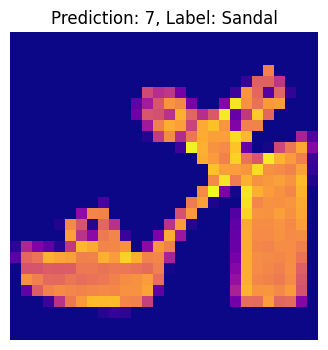

prediction 6
label 4


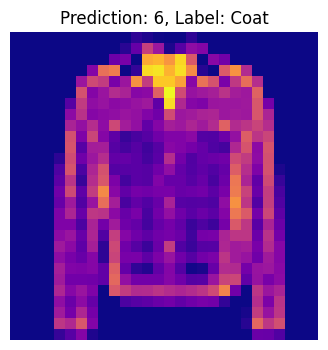

prediction 6
label 3


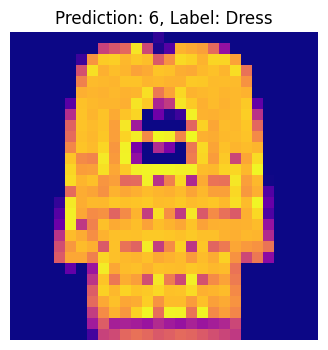

prediction 4
label 4


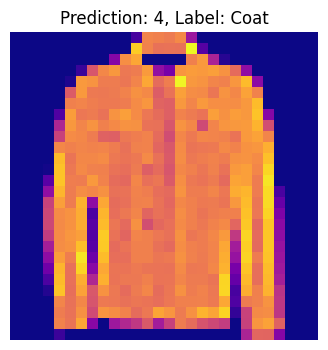

prediction 6
label 6


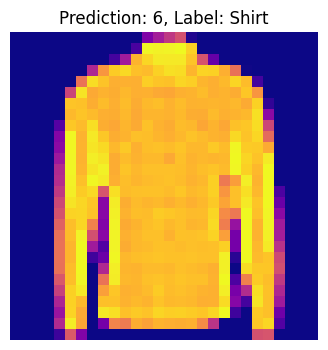

prediction 1
label 1


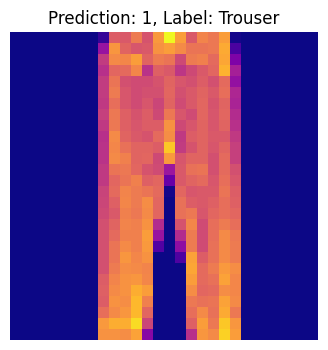

prediction 3
label 3


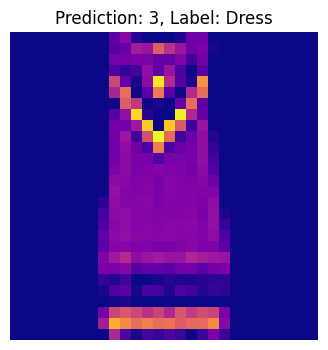

prediction 0
label 0


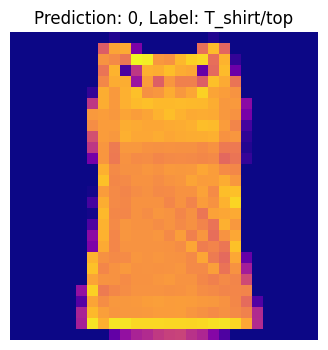

In [16]:
def predict(X,w1,b1,w2,b2):
    _,_,_,a2=forward_prop(w1,b1,w2,b2,X)
    prediction=get_predict(a2)
    return prediction
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def test(index,w1,b1,w2,b2):
    current=X_train[:,index:index+1]
    prediction=predict(current,w1,b1,w2,b2)[0]
    label=Y_train[index]
    print('prediction',prediction)
    print('label',label)
    current = current.reshape((28, 28))*255
    plt.figure(figsize=(4, 4))
    plt.gray()
    plt.imshow(current, cmap='plasma', vmin=18, vmax=255, interpolation='none')  # Specify colormap and value range
    plt.title(f'Prediction: {prediction}, Label: {class_names[label]}')
    plt.axis('off')
    plt.show()
def display_image(index, X_train, Y_train, class_names, w1, b1, w2, b2):

  current = X_train[:, index:index + 1]
  prediction = predict(current, w1, b1, w2, b2)[0]
  label = Y_train[index]

  current = current.reshape((28, 28)) * 255
  plt.figure(figsize=(4, 4))
  plt.gray()
  plt.imshow(current, cmap='Greys', vmin=0, vmax=255, interpolation='nearest')

  plt.title(f'Prediction: {prediction}, Label: {class_names[label]}')
  plt.axis('off')
  plt.show()


num_images = X_train.shape[1]  

# Create a grid for displaying multiple images
plt.figure(figsize=(12, 12))


for i in range(12):
  test(i,w1,b1,w2,b2)


In [18]:

def display_image(index, X_train, Y_train, class_names, w1, b1, w2, b2):

  current = X_train[:, index:index + 1]
  prediction = predict(current, w1, b1, w2, b2)[0]
  label = Y_train[index]

  current = current.reshape((28, 28)) * 255
  plt.figure(figsize=(4, 4))
  plt.gray()
  plt.imshow(current, cmap='inferno', vmin=0, vmax=255, interpolation='nearest')

  plt.title(f'Prediction: {prediction}, Label: {class_names[label]}')
  plt.axis('off')
  plt.show()

X_train=np.array(X_train)

def count_image( X_train, Y_train, class_names):
    count={}
    for name in class_names:
      count[name]=0
    
    for label in Y_train:
       count[class_names[label]]+=1

    return count




In [8]:

from pprint import pprint 
from collections import Counter
def count_image(X_train, Y_train, class_names):
    count={}
    for name in class_names:
      count[name]=0
    
    for label in Y_train:
       count[class_names[label]]+=1

    return count

category=count_image(X_train,Y_train,class_names)
counter=Counter(Y_train)
print(counter)



for i,j in counter.items():
   category_name = class_names[i]
   print(f'Count of {category_name} is {j} using Y_test')
print()

for i,j in category.items():
   print(f'Count of {i} is {j} using function')


Counter({np.int64(6): 5916, np.int64(1): 5907, np.int64(4): 5904, np.int64(2): 5903, np.int64(3): 5903, np.int64(5): 5902, np.int64(9): 5901, np.int64(7): 5900, np.int64(0): 5883, np.int64(8): 5881})
Count of Ankle boot is 5901 using Y_test
Count of Bag is 5881 using Y_test
Count of Pullover is 5903 using Y_test
Count of Trouser is 5907 using Y_test
Count of Sandal is 5902 using Y_test
Count of Coat is 5904 using Y_test
Count of Dress is 5903 using Y_test
Count of Shirt is 5916 using Y_test
Count of T_shirt/top is 5883 using Y_test
Count of Sneaker is 5900 using Y_test

Count of T_shirt/top is 5883 using function
Count of Trouser is 5907 using function
Count of Pullover is 5903 using function
Count of Dress is 5903 using function
Count of Coat is 5904 using function
Count of Sandal is 5902 using function
Count of Shirt is 5916 using function
Count of Sneaker is 5900 using function
Count of Bag is 5881 using function
Count of Ankle boot is 5901 using function
